In [1]:
# 🔧 Adjust working directory so relative paths in config.py resolve correctly
import os
import sys

# Move up to project root if running from notebooks/
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

# Add root to sys.path so `src` module works
sys.path.append(os.getcwd())

# ✅ Confirm it worked
print("Working directory:", os.getcwd())

# 📦 Imports
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

from src.train_model import train_sentiment_model
from src.config import REPORTS_PATH, PROCESSED_DATA_PATH


Working directory: c:\Users\hp\Desktop\ML-NLP-Engineer


In [2]:
display(Markdown("""
# 🏋️‍♂️ Model Training & Experimentation

This notebook supports:
- 🔁 Switching between `DistilBERT`, etc.
- ⚙️ Hyperparameter tuning (epochs, batch size, sample size)
- 📊 Visual feedback on training metrics
- 🧪 Easy iteration and comparison
"""))


# 🏋️‍♂️ Model Training & Experimentation

This notebook supports:
- 🔁 Switching between `DistilBERT`, etc.
- ⚙️ Hyperparameter tuning (epochs, batch size, sample size)
- 📊 Visual feedback on training metrics
- 🧪 Easy iteration and comparison


In [3]:
# ⏹️ Change these values to try different experiments
model_type = "distilbert"   # Options: "distilbert", "xlm-roberta"
epochs = 3
batch_size = 8
sample_size = 1500  # Balanced: 600 Negative, 300 Neutral, 600 Positive


In [4]:
# 🔄 Run training with your selected config
train_sentiment_model(
    model_type=model_type,
    batch_size=batch_size,
    epochs=epochs,
    sample_size=sample_size
)


Using 1500 samples
Label distribution: [600 300 600]


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizing...


Epoch 1: 100%|██████████| 150/150 [05:40<00:00,  2.27s/it, loss=1.12]


Epoch 1 | Loss: 1.1053 | F1: 0.2692 | Time: 340.3s


Epoch 2: 100%|██████████| 150/150 [05:48<00:00,  2.32s/it, loss=1.03] 


Epoch 2 | Loss: 1.0882 | F1: 0.4339 | Time: 348.7s


Epoch 3: 100%|██████████| 150/150 [08:18<00:00,  3.33s/it, loss=1]    


Epoch 3 | Loss: 0.9547 | F1: 0.5677 | Time: 499.1s
Quantized model saved to models/distilbert_quantized_sentiment
Training complete. Quantized model saved.


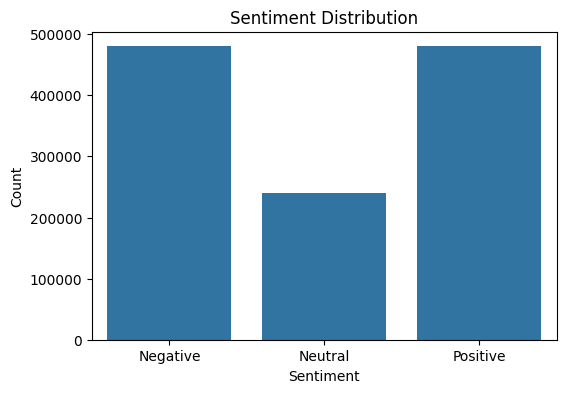

In [ ]:
# 🧮 Visualizing label distribution from processed data
df = pd.read_csv("data/processed_reviews.csv")
df_sample = df[df['sentiment'].isin(['Negative', 'Neutral', 'Positive'])]

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df_sample, order=['Negative', 'Neutral', 'Positive'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()